# Series relations for $N_n$ used when $k^2 < 1/2$:

In this notebook we'll validate the series expressions for N_n with arbitrary n:

In [1]:
import numpy as np
from scipy.special import ellipe,ellipk
from scipy.special import gamma
from scipy.integrate import quad
import matplotlib.pyplot as pl
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
epsabs = 1e-12
epsrel = 1e-12

Here is the expression for the integral N_n:

In [2]:
def N_n(r, b, n):
    if (1 + r <= b):
        return 0
    elif abs(1 - r) < b and b <= 1 + r:
        k2 = (1 - (b- r) ** 2) / (4*b*r)
        kappa_half = np.arcsin(np.sqrt(k2))
        func = lambda x: np.sqrt(k2-np.sin(x)**2)**n*np.sin(x)**2
        res, err = quad(func,-kappa_half,kappa_half,epsabs=epsabs,epsrel=epsrel)
        return np.sqrt(4*b*r)**n*res
    elif b <= 1 - r:
        return 0
    elif b <= r - 1:
        return 0
    else:
        raise NotImplementedError("Missing case!")

Another function evaluates this integral with a series expansion:

In [3]:
def N_series(r,b,n):
    if (1 + r <= b):
        return 0
    elif abs(1 - r) < b and b <= 1 + r:
        k2 = (1 - (b- r) ** 2) / (4*b*r)
        alpha = np.sqrt(1-(b-r)**2)**n*np.sqrt(k2**3*np.pi)/2*gamma(1+0.5*n)/gamma(2.5+0.5*n)
        k2n = 1
        Nn = alpha
        for j in range(1,30):
            k2n *= k2
            alpha *= (4*j*j-1)/(2*j*(3+n+2*j))
            Nn += alpha*k2n
        return Nn
    elif b <= 1 - r:
        return 0
    elif b <= r - 1:
        return 0
    else:
        raise NotImplementedError("Missing case!")

Let's show that the expressions yield the same answer (to within the error of the numerical method) over a large range of $b$ and $r$ values:

In [6]:
n = 50
barr = np.linspace(1e-4, 2, n)
rarr = np.linspace(1e-4, 2, n)
diff = np.zeros((n, n))

# Nu is the order of the integral:
def plot(Nu):
    for i, b in enumerate(barr):
        for j, r in enumerate(rarr):
            # Note that we only use the series expansion
            # in the code for k2 < 1/2.
            k2 = (1 - (b- r) ** 2) / (4*b*r)
            if k2 < 0.5:
                diff[j, i] = abs(N_n(r, b, Nu) - N_series(r, b, Nu))
            else:
                diff[j, i] = np.nan
    fig = pl.figure(figsize=(10, 8))
    pl.imshow(diff, origin="lower", extent=(0, 2, 0, 2))
    pl.xlabel("Impact parameter", fontsize=16)
    pl.ylabel("Radius ratio", fontsize=16)
    cb = pl.colorbar()
    cb.ax.set_ylabel("Difference", fontsize=16);

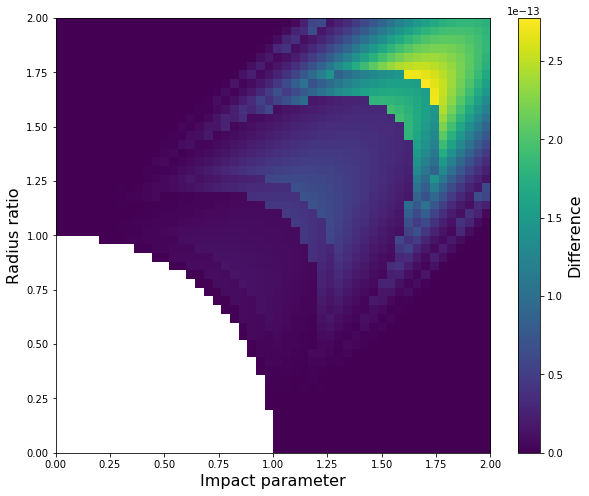

In [7]:
plot(5)

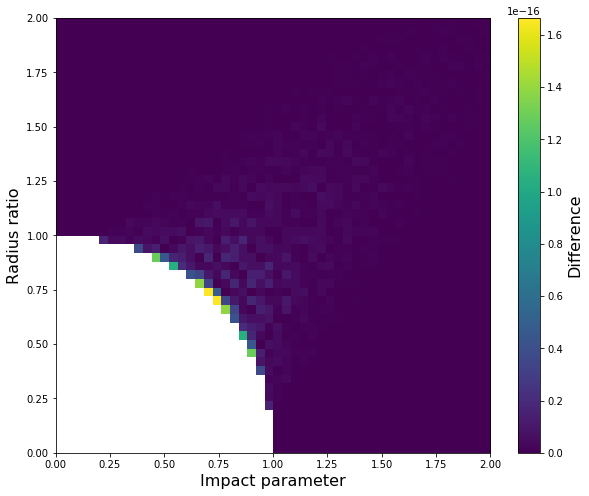

In [8]:
plot(6)

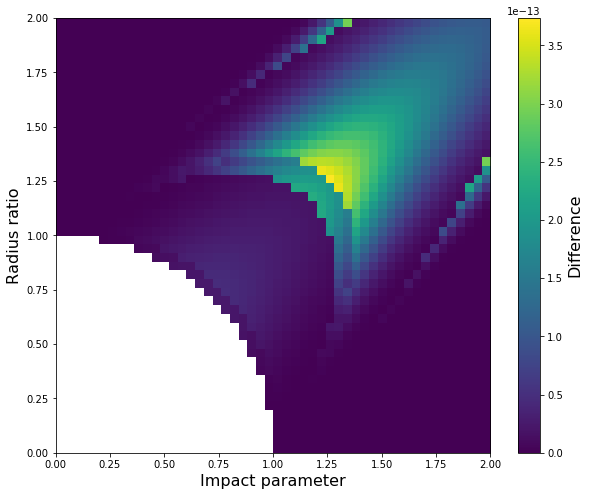

In [9]:
plot(7)

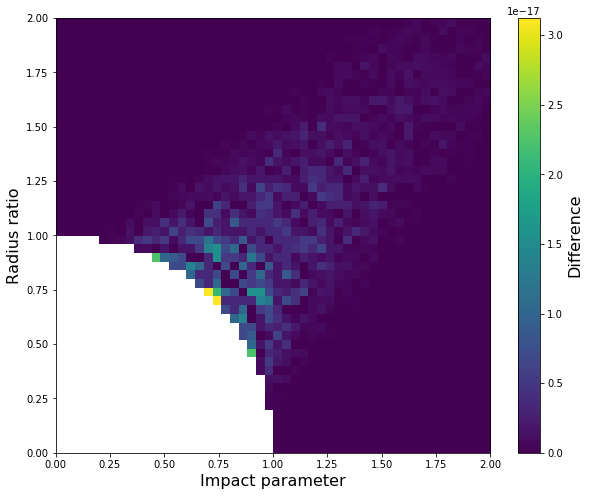

In [10]:
plot(8)

The difference is numerically precise everywhere, indicating that our expression is correct.